In [1]:
import sys
sys.path.insert(0, '../../')  

import math
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.animation as animation
from gasp import process_data_for_gasp, train_gasp, simulate_ssfp_sampling, SSFPParams, responses, sampling

In [2]:
def calculate_RSME(recon, target):
    rmse = np.sqrt(np.mean((recon - target)**2))
    return rmse

def calculate_NRMSE(recon, target):
    nrmse = np.sqrt(np.mean((recon - target)**2) / np.mean(target**2))
    return nrmse

(6, 11)
scheme=fibonacci
scheme=spiral
scheme=logpolar
scheme=grid
scheme=gridmult
scheme=gridpow2


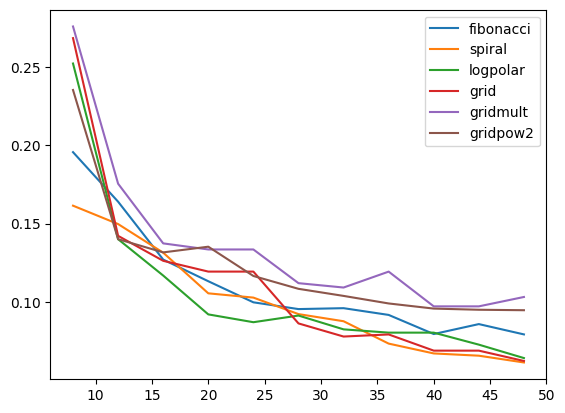

In [29]:
D = responses.gaussian(width=256, bw=0.2, shift=-0.2)
tr_range = (5e-3, 20e-3)

sampling_schemes = [
    ('fibonacci', lambda n: sampling.fibonacci_sampling(n_points=n, tr_range=tr_range)),
    ('spiral', lambda n: sampling.spiral_sampling(n_points=n, n_turns=5, tr_range=tr_range)),
    ('logpolar', lambda n: sampling.log_polar_sampling(n_points=n, tr_range=tr_range)),
    ('grid', lambda n: sampling.grid_sampling(n_points=n, n_turns=5, tr_range=tr_range)),
    ('gridmult', lambda n: sampling.grid_multiples_sampling(n_points=n, n_turns=5, tr_range=tr_range)),
    ('gridpow2', lambda n: sampling.grid_pow2_sampling(n_points=n, n_turns=3, tr_range=tr_range)),
]

n_points = np.linspace(8, 48, 11).astype(np.int64)   
RMSE = np.zeros((len(sampling_schemes), len(n_points)))
print(RMSE.shape)
for i, scheme in enumerate(sampling_schemes):
    print(f"scheme={scheme[0]}")
    for j, n in enumerate(n_points):
        #print(f"n={n}")
        TRs, PCs = scheme[1](n)
        params = SSFPParams(n, np.deg2rad(60), TRs, PCs)
        M = simulate_ssfp_sampling(width=256, height=1, params=params, minTR = np.min(params.TRs), gradient = 2 * np.pi, phantom_type='line')
        Ic, An = train_gasp(M, D)
        RMSE[i, j] = np.sqrt(np.mean((np.abs(Ic) - D)**2))
        #plt.plot(np.abs(Ic).T)

plt.plot(n_points, RMSE.T)
plt.legend(list(map(lambda x: x[0], sampling_schemes)))
plt.show()

In [26]:
list(map(lambda x: x[0], sampling_schemes))

['fibonacci', 'spiral', 'logpolar', 'grid', 'gridmult', 'gridpow2']